In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objs as go
from statsmodels.graphics.mosaicplot import mosaic
import warnings
warnings.filterwarnings('ignore')

df_listing = pd.read_csv("listing_data_clean_eda.csv")

print(df_listing.shape)

(57636, 72)


In [55]:
sns.set_style("whitegrid")

In [56]:
airbnb = df_listing

In [57]:
top_host_id = airbnb.groupby(['host_id']).size().reset_index(name='Count of hosts')
top_host_id.sort_values('Count of hosts', ascending = False, inplace = True)
top_host_id=top_host_id.head()

In [58]:
top_host_id

,host_id,Count of hosts
16836,33889201,312
15368,28820321,221
20222,48165024,140
1248,1432477,131
9735,13557337,129


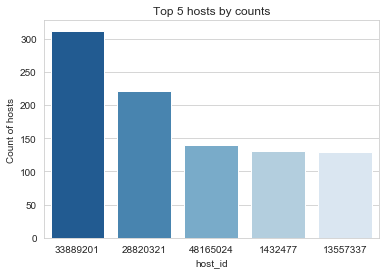

In [59]:
plot1 = sns.barplot(data = top_host_id,x = 'host_id',y = 'Count of hosts',
                    order = top_host_id['host_id'], palette="Blues_r").set_title('Top 5 hosts by counts')

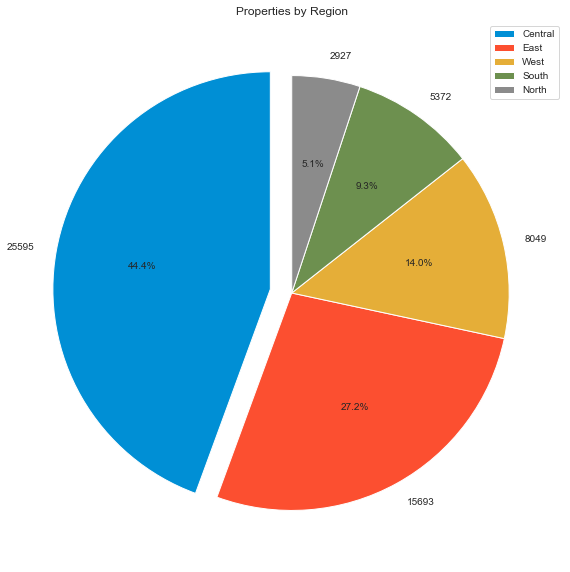

In [60]:
labels = airbnb.region.value_counts().index
colors = ['#008fd5','#fc4f30','#e5ae38','#6d904f','#8b8b8b']
explode = (0.1,0,0,0,0)
plt.figure(figsize=(10,10))
shape = airbnb.region.value_counts().values
plt.pie(shape, explode = explode, labels=shape, colors= colors, autopct = '%1.1f%%', startangle=90)
plt.legend(labels)
plt.title('Properties by Region')
plt.show()

In [61]:
coord = airbnb.loc[:,['longitude','latitude']]
coord.describe()

,longitude,latitude
count,57636.000000,57636.000000
mean,-0.128557,51.509739
std,0.091218,0.045397
min,-0.494850,51.294790
25%,-0.187952,51.485760
50%,-0.125535,51.514140
75%,-0.070830,51.536810
max,0.268950,51.681690


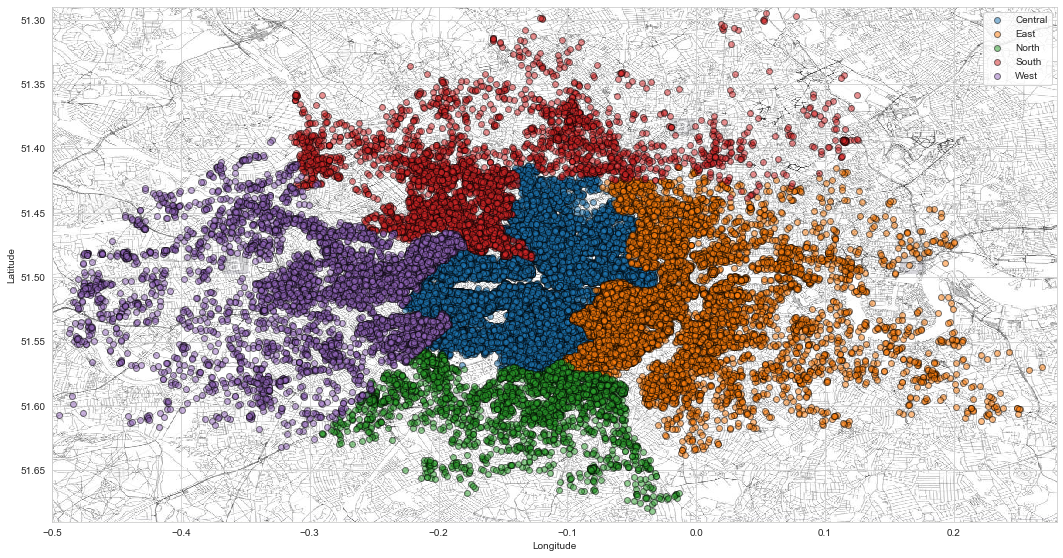

In [62]:
plt.figure(figsize=(18,12))
BBox = (-0.5, 0.28, 51.69, 51.29)
london_map = plt.imread('map_bnw.jpg')
plt.imshow(london_map,zorder=0,extent=BBox)
ax = plt.gca()
groups = airbnb.groupby('region')
for name,group in groups :
    plt.scatter(group['longitude'],group['latitude'],label=name,alpha=0.5, edgecolors='k')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

In [63]:
airbnb1=airbnb[airbnb.review_scores_rating>85]

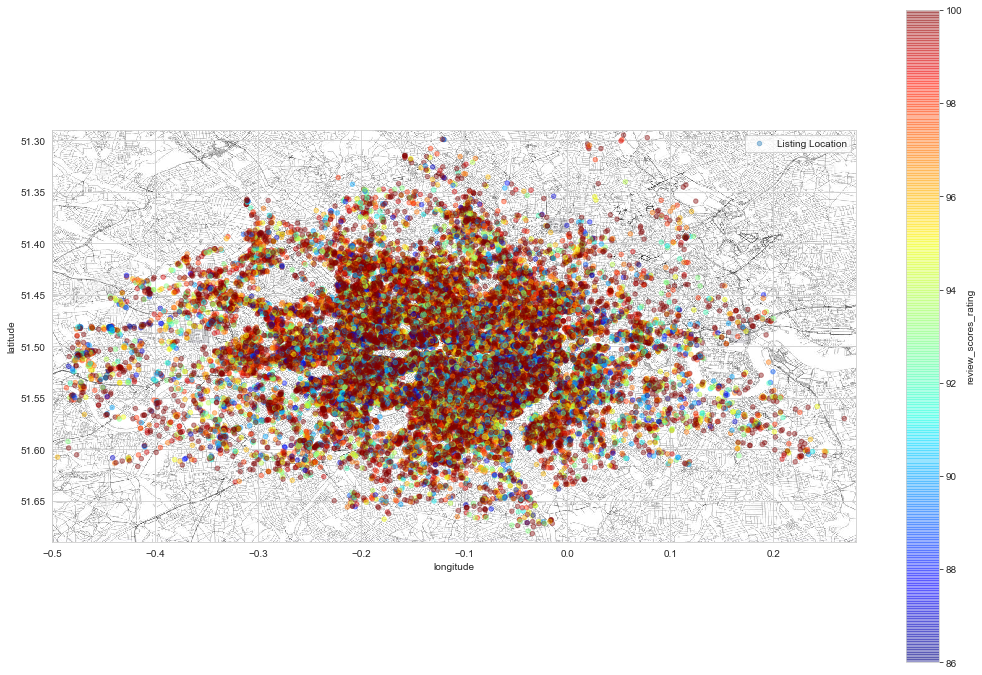

In [64]:
plt.figure(figsize=(18,12))
sg_map = plt.imread('map_bnw.jpg')
plt.imshow(london_map,zorder=0,extent=BBox)
ax = plt.gca()
airbnb1.plot(kind='scatter',x='longitude',y='latitude',
            label='Listing Location', 
            c='review_scores_rating', 
            ax=ax, 
            cmap=plt.get_cmap('jet'),
            colorbar=True, 
            alpha=0.4, 
            zorder=5)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Review score Value')

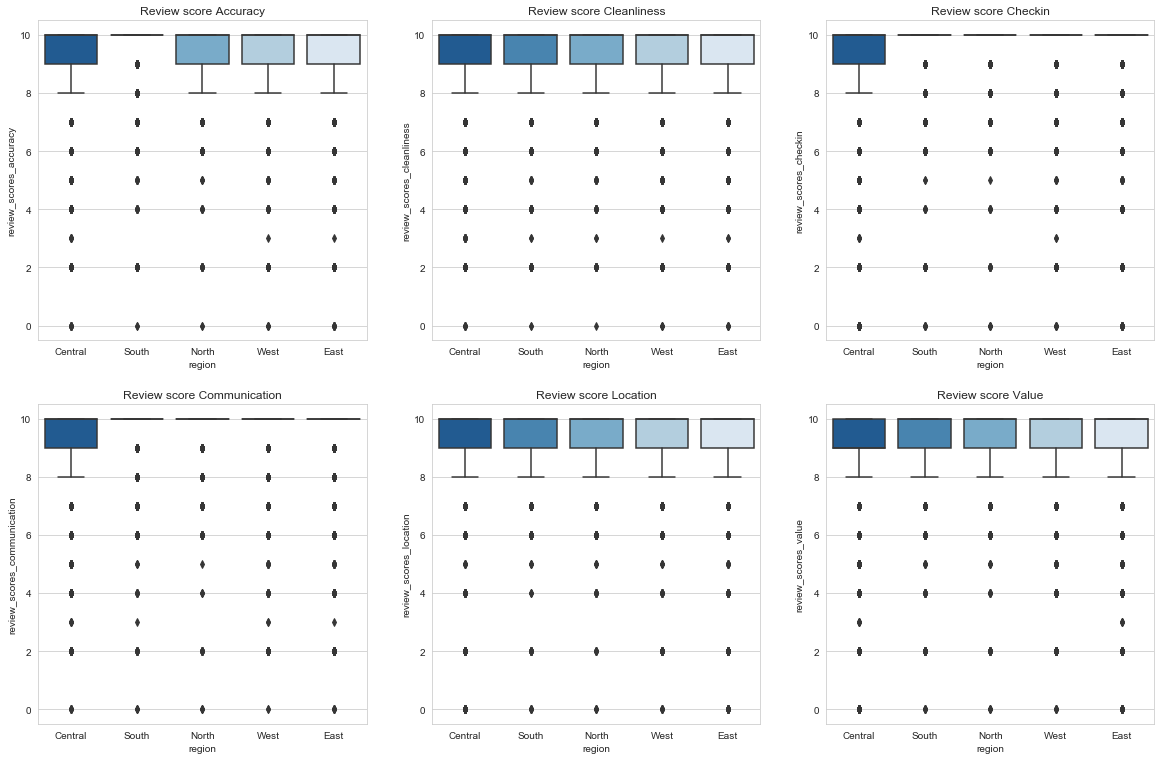

In [65]:
f = plt.figure(figsize=(20, 20))
gs = f.add_gridspec(3, 3)
ax=f.add_subplot(gs[0,0])
sns.boxplot(y='review_scores_accuracy',x='region',data = airbnb, palette="Blues_r")
plt.title('Review score Accuracy')
ax=f.add_subplot(gs[0,1])
sns.boxplot(y='review_scores_cleanliness',x='region',data = airbnb, palette="Blues_r")
plt.title('Review score Cleanliness')
ax=f.add_subplot(gs[0,2])
sns.boxplot(y='review_scores_checkin',x='region',data = airbnb, palette="Blues_r")
plt.title('Review score Checkin')
ax=f.add_subplot(gs[1,0])
sns.boxplot(y='review_scores_communication',x='region',data = airbnb, palette="Blues_r")
plt.title('Review score Communication')
ax=f.add_subplot(gs[1,1])
sns.boxplot(y='review_scores_location',x='region',data = airbnb, palette="Blues_r")
plt.title('Review score Location')
ax=f.add_subplot(gs[1,2])
sns.boxplot(y='review_scores_value',x='region',data = airbnb, palette="Blues_r")
plt.title('Review score Value')

Text(0.5, 1.0, 'Review score Value')

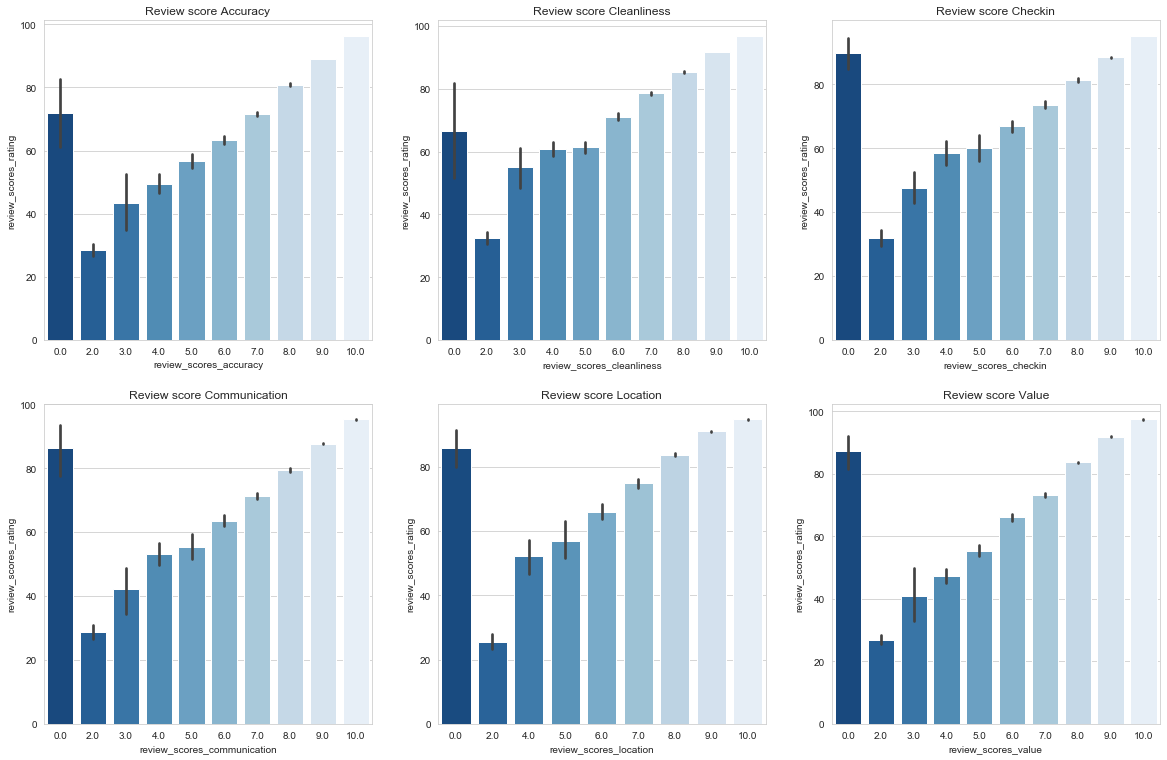

In [66]:
f = plt.figure(figsize=(20, 20))
gs = f.add_gridspec(3, 3)
ax=f.add_subplot(gs[0,0])
sns.barplot(x='review_scores_accuracy',y='review_scores_rating', data = airbnb, palette="Blues_r")
plt.title('Review score Accuracy')
ax=f.add_subplot(gs[0,1])
sns.barplot(x='review_scores_cleanliness',y='review_scores_rating',data = airbnb, palette="Blues_r")
plt.title('Review score Cleanliness')
ax=f.add_subplot(gs[0,2])
sns.barplot(x='review_scores_checkin',y='review_scores_rating',data = airbnb, palette="Blues_r")
plt.title('Review score Checkin')
ax=f.add_subplot(gs[1,0])
sns.barplot(x='review_scores_communication',y='review_scores_rating',data = airbnb, palette="Blues_r")
plt.title('Review score Communication')
ax=f.add_subplot(gs[1,1])
sns.barplot(x='review_scores_location',y='review_scores_rating',data = airbnb, palette="Blues_r")
plt.title('Review score Location')
ax=f.add_subplot(gs[1,2])
sns.barplot(x='review_scores_value',y='review_scores_rating',data = airbnb, palette="Blues_r")
plt.title('Review score Value')

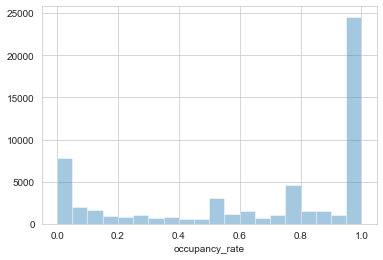

In [67]:
sns.distplot(airbnb['occupancy_rate'], kde=False, bins=20)
# sns.distplot(df['optimistic_occupancy'], kde=False, bins=20, color='gold')

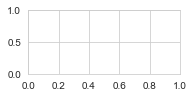

In [68]:
color_dict = {'Private room': '#cc5a49', 'Entire home/apt' : '#4586ac', 'Shared room' : '#21908d', 'Hotel room' : '#C0C0C0' }
airbnb_types=airbnb.groupby(['region', 'room_type']).size()
for region in airbnb.region.unique():
    
    airbnb_reg=airbnb_types[region]
    labels = airbnb_reg.index
    sizes = airbnb_reg.values
              
    colors = [color_dict[x] for x in labels]
    
    plot_num = 321
    plt.subplot(plot_num)
    reg_ch = go.Figure(data = [go.Pie(labels = labels, values = sizes, hole = 0.6)])
    reg_ch.update_traces(title = region, marker=dict(colors=colors))
    reg_ch.show()
    
    plot_num += 1

In [70]:
airbnbcorr=airbnb

In [71]:
airbnbcorr['no_of_amenities']=airbnbcorr['hangers']+airbnbcorr['washer']+airbnbcorr['tv']+airbnbcorr['detector']+airbnbcorr['kitchen']+airbnbcorr['heating']+airbnbcorr['essentials']+airbnbcorr['wifi']+airbnbcorr['iron']+airbnbcorr['dryer']

In [72]:
airbnbcorr = airbnb.drop(['listing_id','host_id','calculated_host_listings_count','calculated_host_listings_count_entire_homes',
                        'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms',
                         'hangers', 'washer', 'tv', 'detector', 'kitchen', 'heating', 'essentials', 'iron', 'wifi',
                          'dryer'],axis=1)

In [73]:
corr = airbnbcorr.corr()
corr.style.background_gradient(cmap='coolwarm')